# 使用scikit-learn中的kNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# 加载鸢尾花数据
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

## train_test_split

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 形成 150 个索引的随机排列
shuffle_indexes = np.random.permutation(len(X))

In [7]:
shuffle_indexes

array([104,  43, 127,  72,  48,  67,  70,  15,  87,   8,  94, 115,  40,
        84, 137, 135,  91, 101, 110,  64,  59, 129,  20,  93, 145,  57,
        26, 149, 142, 139, 126,  52, 130,  34, 107,  51,  76,  88,  92,
        11, 122,  53,  36, 109,  41, 102,  58,  60,  14,  73, 108,  79,
        56,  32,  61,  77,  46,  68, 125, 144,  17,  37,  31,  49,  86,
        74, 120,  69,  38, 114,  62,  80, 111, 105,  50, 148,  30, 132,
       113,  24,  98,  96, 124,  23,  16, 133,  39,  54, 112, 128,  90,
       106,  29,  33,  89, 141,  12, 117,  95,  78,   0,   9, 103,  19,
        10, 136,  25,  75,  55,  99,   6,   4,   5,  83,  18,   3, 143,
        21,  28,  22,  42, 116,  65,  35,  44,  27,  97,   1,  81, 146,
       140, 131,  47, 100,  45, 118, 138,   7, 134,  85,  71,  13,  82,
       119, 121, 147,   2,  63, 123,  66])

In [8]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [9]:
test_size

30

In [10]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

X_test = X[test_indexes]
y_test = y[test_indexes]

X_train = X[train_indexes]
y_train = y[train_indexes]

## 使用封装好的kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
y_predict = knn_clf.predict(X_test)
y_predict

array([2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 2])

In [13]:
y_test

array([2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 2])

In [14]:
sum(y_predict == y_test)

29

In [15]:
sum(y_predict == y_test) / len(y_test)

0.9666666666666667

## 使用 sklearn 中的 train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# 手写数字实战

In [18]:
import matplotlib
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [19]:
# print(digits.DESCR)

In [20]:
X = digits.data
X.shape

(1797, 64)

In [21]:
y = digits.target
y.shape

(1797,)

In [22]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [24]:
X[:20]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 13., 11.,  1.]])

In [25]:
some_digit = X[666]
y[666]

0

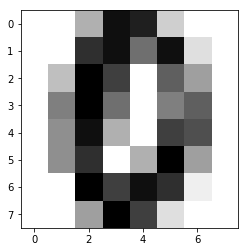

In [26]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [27]:
# 设置随机数种子保证每次运行结果一样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
y_predict = knn_clf.predict(X_test)
y_predict

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 5, 7, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [29]:
sum(y_predict == y_test) / len(y_test)

0.9888888888888889

# scikit-learn中的accuracy_score

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

In [31]:
# 当不想显式计算 y_predict 时
knn_clf.score(X_test, y_test)

0.9888888888888889

# 超参数

* 超参数：在算法运行前需要决定的参数
* 模型参数：算法过程中学习的参数

kNN算法没有模型参数，kNN算法中的k是典型的超参数

## 寻找好的超参数

* 领域知识
* 经验数值
* 实验搜索

### 寻找最好的K

In [32]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k = ", best_k)
print("best_score =", best_score)

best_k =  4
best_score = 0.9916666666666667


### 考虑距离或者不考虑距离

In [33]:
best_score = 0.0
best_method = ""
best_k = -1
# 分别为不考虑距离和考虑距离，考虑距离时权值为距离的倒数
for method in ["uniform", "distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
        
print("best_k = ", best_k)
print("best_score =", best_score)
print("best_method =", best_method)

best_k =  4
best_score = 0.9916666666666667
best_method = uniform


#### 明科夫斯基距离

$ (\sum \limits^n_{i=1}\vert X^{(a)}_i - X^{(b)}_i\vert^p)^{\frac 1 p} $
* 当 p=1 时为曼哈顿距离
* 当 p=2 是为欧拉距离

#### 更多的距离定义

![更多距离定义](./images/more_distance.png)

In [34]:
%%time
# 网格搜索
best_score = 0.0
best_k = -1
best_p = -1
for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
        
print("best_k = ", best_k)
print("best_score =", best_score)
print("best_p = ", best_p)

best_k =  3
best_score = 0.9888888888888889
best_p =  2
CPU times: user 17.5 s, sys: 82.2 ms, total: 17.6 s
Wall time: 17.7 s


## Grid Search

In [35]:
param_grid = [
    # 第一组参数
    {
        'weights' : ['uniform'],
        'n_neighbors' : [i for i in range(1,11)]
    },
    # 第二组参数
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1,6)]
    }
]

In [36]:
knn_clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
# cv 交叉验证
grid_search = GridSearchCV(knn_clf, param_grid)

In [37]:
%%time
grid_search.fit(X_train, y_train)

/Users/vlaser/Desktop/ML/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2min 20s, sys: 412 ms, total: 2min 20s
Wall time: 2min 21s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# 最佳分类器
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [39]:
# 最佳参数
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [40]:
# 最佳分数
grid_search.best_score_

0.9853862212943633

In [41]:
knn_clf = grid_search.best_estimator_
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [42]:
knn_clf.score(X_test, y_test)

0.9833333333333333

In [43]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=5)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/vlaser/Desktop/ML/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.3s


CPU times: user 585 ms, sys: 138 ms, total: 723 ms
Wall time: 40.1 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   40.1s finished


## 数据归一化

* 解决方案：将所有的数据映射到同一尺度
* 最值归一化：把所有数据映射到0-1之间(normalization)，适用于分布有明显边界的情况，受outlier影响较大

$ x_{scale} = {{x - x_{min}} \over {x_{max} - x_{min}}} $
* 均值方差归一化：把所有数据诡异到均值为0方差为1的分布中(standardization)，适用于数据没有明显边界，有可能存在极端数据值

$ x_{scale} = {{x-x_{mean}} \over s} $

### 最值归一化

In [44]:
x = np.random.randint(0, 100, size=100)
x

array([89, 48,  1, 87, 51, 25, 27, 38,  3, 49, 94, 16, 68, 82, 79, 23, 91,
       43, 60, 97, 66, 73, 58, 40, 15, 57, 81, 89, 26, 52, 58, 34,  7, 51,
       83, 84, 92, 89, 54, 22, 74, 41,  8, 26, 44, 10, 12, 62, 83,  4, 80,
       49, 80, 69,  2, 66, 76, 52, 87,  1, 89, 69, 21, 79, 87, 64, 30, 64,
       72, 95, 68, 59, 26, 51, 84, 32, 88, 22, 33,  8,  3, 76, 18,  8, 68,
       54, 22, 22, 29, 72, 48, 36, 58, 28, 16, 90, 24,  7, 77, 79])

In [45]:
(x-np.min(x))/(np.max(x)-np.min(x))

array([0.91666667, 0.48958333, 0.        , 0.89583333, 0.52083333,
       0.25      , 0.27083333, 0.38541667, 0.02083333, 0.5       ,
       0.96875   , 0.15625   , 0.69791667, 0.84375   , 0.8125    ,
       0.22916667, 0.9375    , 0.4375    , 0.61458333, 1.        ,
       0.67708333, 0.75      , 0.59375   , 0.40625   , 0.14583333,
       0.58333333, 0.83333333, 0.91666667, 0.26041667, 0.53125   ,
       0.59375   , 0.34375   , 0.0625    , 0.52083333, 0.85416667,
       0.86458333, 0.94791667, 0.91666667, 0.55208333, 0.21875   ,
       0.76041667, 0.41666667, 0.07291667, 0.26041667, 0.44791667,
       0.09375   , 0.11458333, 0.63541667, 0.85416667, 0.03125   ,
       0.82291667, 0.5       , 0.82291667, 0.70833333, 0.01041667,
       0.67708333, 0.78125   , 0.53125   , 0.89583333, 0.        ,
       0.91666667, 0.70833333, 0.20833333, 0.8125    , 0.89583333,
       0.65625   , 0.30208333, 0.65625   , 0.73958333, 0.97916667,
       0.69791667, 0.60416667, 0.26041667, 0.52083333, 0.86458

In [46]:
X = np.random.randint(0,100,(50,2))
X[:10,:]

array([[83, 80],
       [61, 82],
       [93, 67],
       [94, 57],
       [19, 68],
       [24, 50],
       [80, 83],
       [51, 57],
       [43, 58],
       [96, 95]])

In [47]:
# 转为浮点
X = np.array(X, dtype=float)
X[:10, :]

array([[83., 80.],
       [61., 82.],
       [93., 67.],
       [94., 57.],
       [19., 68.],
       [24., 50.],
       [80., 83.],
       [51., 57.],
       [43., 58.],
       [96., 95.]])

In [48]:
# 每一列均值归一
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1]))
X[:10,:]

array([[0.84693878, 0.80412371],
       [0.62244898, 0.82474227],
       [0.94897959, 0.67010309],
       [0.95918367, 0.56701031],
       [0.19387755, 0.68041237],
       [0.24489796, 0.49484536],
       [0.81632653, 0.83505155],
       [0.52040816, 0.56701031],
       [0.43877551, 0.57731959],
       [0.97959184, 0.95876289]])

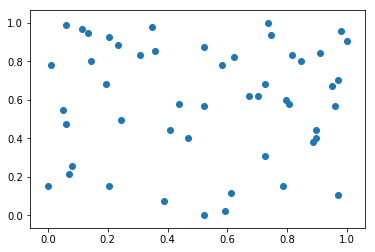

In [49]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [50]:
np.mean(X[:,0])

0.5253061224489796

In [51]:
np.std(X[:,0])

0.3196614202144373

### 均值方差归一化

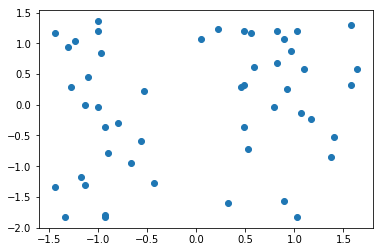

In [52]:
X2 = np.random.randint(0,100,(50,2))
X2 = np.array(X2, dtype=float)
X2[:,0] = (X2[:,0] - np.mean(X2[:,0]))/np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1]))/np.std(X2[:,1])

plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [53]:
np.mean(X2[:,0])

7.327471962526034e-17

In [54]:
np.std(X2[:,0])

0.9999999999999999

### 对测试数据集如何归一化

$ {x_{test} - mean_{train}} \over std_{train} $

需要保存训练数据集得到的均值和方差

In [55]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [56]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

#### scikit-learn中的StandardScaler

In [58]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [60]:
standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [61]:
# 对训练集数据和测试集数据进行transform
# 测试集的数据是根据训练集的均值和方差进行transform的
X_train = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
knn_clf.score(X_test_standard, y_test)

1.0

In [63]:
# 如果不对测试集数据进行均值方差归一，得到的结果如下
knn_clf.score(X_test, y_test)

0.3333333333333333

# 更多有关K近邻算法

* 解决分类问题，天然可以解决多分类问题（思想简单，效果强大）
* 使用K近邻算法解决回归问题（sklearn.neighbors.KNeighborsRegressor）

* 缺点：

```
1. 效率低下；m个样本，n个特征，O(m\*N)
2. 高度数据相关
3. 预测结果不具可解释性
4. 维数灾难->降维
```